In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uproot3
import sklearn
from sklearn.utils import shuffle
from matplotlib.lines import Line2D
import math
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import shap

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from itertools import chain
import tensorflow as tf
from keras import optimizers, initializers

import itertools
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

2024-08-28 11:43:35.710004: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-28 11:43:35.780663: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/anza-tshilidzi/root/root-6.26.06-install/lib::/home/anza-tshilidzi/Downloads/LHAPDF/lib:/home/anza-tshilidzi/Downloads/LHAPDF/lib
2024-08-28 11:43:35.780696: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
SigTree1 = uproot3.open('Signal_events500k1.root')
SigTree2 = uproot3.open('Signal_events500k2.root')
BackTree1 = uproot3.open('Back_events300k1.root')
BackTree2 = uproot3.open('Back_events300k2.root')
BackTree3 = uproot3.open('Back_events400k.root')

In [5]:
SigArr1 = SigTree1['tree'].arrays()
SigArr2 = SigTree2['tree'].arrays()

SigDf1 = pd.DataFrame(SigArr1)
SigDf2 = pd.DataFrame(SigArr2)

# Combine the two DataFrames along rows (axis=0)
SigDf = pd.concat([SigDf1, SigDf2], axis=0)

# Reset the index if needed (optional)
SigDf.reset_index(drop=True, inplace=True)

SigDf.head(10)

#BackArr = BackTree['tree'].arrays()
#BackDf = pd.DataFrame(BackArr)
#BackDf.head(10)

,b'EnrMuP',b'EnrMuM',b'ThetaMuP',b'ThetaMuM',b'PhiMuP',b'PhiMuM',b'EnrBjet1',b'EnrBjet2',b'ThetaBjet1',b'ThetaBjet2',b'PhiBjet1',b'PhiBjet2',b'InMmuPM',b'InMbb',b'Mrecoil',b'weight'
0,55.335168,66.170540,2.390468,2.255659,-1.257939,1.379276,90.131164,26.608907,0.516294,1.655843,-3.037761,-0.373494,85.592011,85.089567,95.253021,0.010165
1,39.202890,83.823100,1.197895,2.265082,-1.647204,3.035906,56.273742,51.464950,1.591423,0.916735,1.155387,-0.624744,90.785080,83.950203,96.067351,0.010165
2,91.853874,25.545246,1.867516,0.590604,-1.089002,-2.971140,79.355760,30.838514,1.374459,2.043361,1.437631,-3.086194,81.228734,78.747568,101.973269,0.010165
3,90.867978,32.343567,1.696695,1.194225,-2.842603,1.486644,66.735948,50.421943,1.079640,2.111337,0.600486,-0.793428,90.424914,87.081989,95.241236,0.010165
4,57.565914,63.817790,0.517632,1.200565,-2.192912,0.527492,81.651797,34.606221,2.272922,1.983148,3.037968,-0.315272,90.168434,90.269110,99.691998,0.010165
5,30.983534,92.439568,1.937703,0.470352,0.189544,-1.815997,76.961564,33.444879,2.606995,1.393013,2.988193,0.941985,92.631326,84.577711,96.793655,0.010165
6,97.869131,26.051180,0.653607,1.671538,1.962117,-1.432238,58.222691,53.369074,1.964703,2.496798,-0.469301,3.128536,92.158594,86.474983,95.042361,0.010165
7,87.596385,35.452746,2.790503,0.995695,-0.504202,0.453746,87.137753,27.416065,0.877479,1.431092,2.699749,-1.063129,91.390704,86.516856,96.579995,0.010165
8,64.994092,57.743989,1.548394,0.424273,-0.107926,-2.025275,55.167360,72.343295,1.667630,2.324584,1.667304,-2.721265,91.662716,96.768468,97.637149,0.010165
9,70.517112,54.506569,2.238415,0.813530,-1.874080,-3.027903,80.198609,30.296679,1.180389,2.281713,1.100131,-0.501425,95.811921,80.185649,95.750112,0.010165


In [6]:
BackArr1 = BackTree1['tree'].arrays()
BackArr2 = BackTree2['tree'].arrays()
BackArr3 = BackTree3['tree'].arrays()

BackDf1 = pd.DataFrame(BackArr1)
BackDf2 = pd.DataFrame(BackArr2)
BackDf3 = pd.DataFrame(BackArr3)

# Combine the two DataFrames along rows (axis=0)
BackDf = pd.concat([BackDf1, BackDf2, BackDf3], axis=0)

# Reset the index if needed (optional)
BackDf.reset_index(drop=True, inplace=True)

BackDf.head(10)

,b'EnrMuP',b'EnrMuM',b'ThetaMuP',b'ThetaMuM',b'PhiMuP',b'PhiMuM',b'EnrBjet1',b'EnrBjet2',b'ThetaBjet1',b'ThetaBjet2',b'PhiBjet1',b'PhiBjet2',b'InMmuPM',b'InMbb',b'Mrecoil',b'weight'
0,102.282689,19.644855,0.410880,1.964995,1.302694,-1.924757,90.514165,26.909387,2.504559,2.043443,-2.116252,0.884097,83.127532,76.159782,91.904379,0.020541
1,51.631872,70.609372,1.683056,0.223100,1.706908,-0.083172,89.837866,28.017752,2.687177,0.872454,-1.338831,-2.841567,91.851372,88.646965,99.075996,0.020541
2,65.617711,59.174904,2.263416,2.235892,-1.362605,1.104504,78.877243,24.913950,0.299324,1.943594,-2.549187,1.862599,91.533477,75.105085,92.098152,0.020541
3,55.363214,67.694456,1.646938,0.943884,1.670957,0.006017,42.334872,37.955375,1.230632,2.084756,-1.822894,-2.278329,91.646258,39.978035,96.799801,0.020541
4,81.765589,44.628754,2.490003,1.964759,0.243177,2.998727,36.802393,65.580431,1.224773,0.440894,-2.509865,0.507232,94.111121,73.353696,90.331231,0.020541
5,90.226594,33.603577,0.561932,1.391862,1.299009,-1.765412,60.095232,53.855182,2.053010,2.569654,-1.806512,1.445551,91.216757,84.248303,94.368487,0.020541
6,64.578045,59.890792,0.184557,1.478681,3.089881,-0.271832,34.410258,60.478561,1.614100,2.780192,-3.044450,1.070039,91.734373,69.702041,93.170687,0.020541
7,78.294233,41.789732,0.812429,1.341165,-0.350951,1.921459,67.159984,28.919509,2.499529,1.974897,-3.066869,-2.888193,92.223438,26.270293,104.705205,0.020541
8,38.741521,85.689082,0.809138,2.014494,0.479135,-0.952715,68.047216,30.846374,1.309956,1.980264,2.167019,-2.318041,89.472862,74.217867,91.049940,0.020541
9,55.958976,63.022035,0.975707,2.047717,2.731735,-2.235350,59.786732,23.212906,2.003709,1.193018,-0.164812,1.113146,86.953751,51.041848,102.812690,0.020541


In [8]:
SigDf.isnull().sum()
#BackDf.isnull().sum()

b'EnrMuP'        0
b'EnrMuM'        0
b'ThetaMuP'      0
b'ThetaMuM'      0
b'PhiMuP'        0
b'PhiMuM'        0
b'EnrBjet1'      0
b'EnrBjet2'      0
b'ThetaBjet1'    0
b'ThetaBjet2'    0
b'PhiBjet1'      0
b'PhiBjet2'      0
b'InMmuPM'       0
b'InMbb'         0
b'Mrecoil'       0
b'weight'        0
dtype: int64

In [84]:
#SigDf = SigDf.sample(n=40000, random_state=42) #SigDf.sample(n=len(BackDf), random_state=42)
#BackDf = BackDf.sample(n=50458, random_state=42)
if SigDf[b'Mrecoil'] < 120:
    print(SigDf[b'Mrecoil'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [10]:
len(BackDf)

168036

In [6]:
#Drop highly correlated features
SigDf = SigDf.drop(columns=[b'EnrBjet1',b'EnrBjet2',b'InMbb',b'ThetaBjet1',b'ThetaBjet2'])

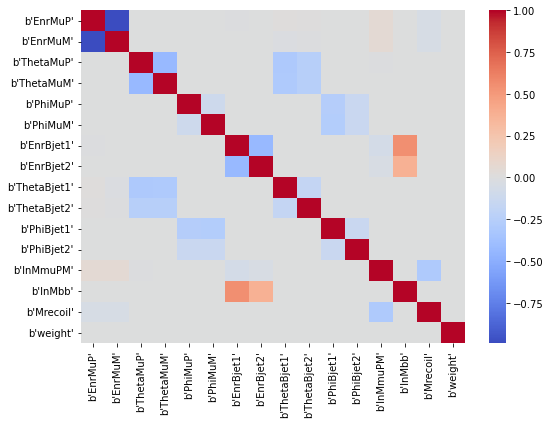

In [11]:
SigCorrMatrix = SigDf.corr()

# Create a correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(SigCorrMatrix, annot=False, cmap='coolwarm')
#plt.title('Correlation Matrix Background', fontsize=25)
plt.tight_layout()
plt.savefig('SigCorr.pdf')
plt.show()

In [8]:
BackDf = BackDf.drop(columns=[b'EnrBjet1',b'EnrBjet2',b'InMbb',b'ThetaBjet1',b'ThetaBjet2'])

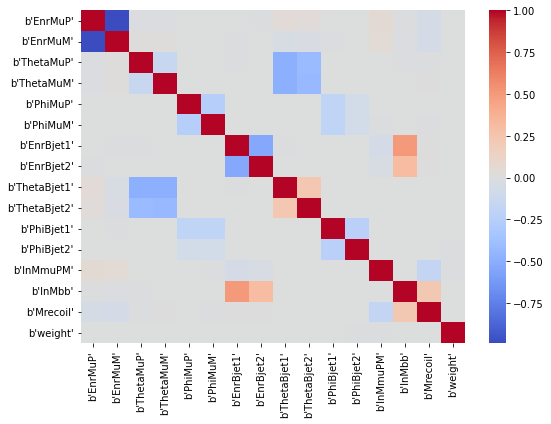

In [12]:
BackCorrMatrix = BackDf.corr()

# Create a correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(BackCorrMatrix, annot=False, cmap='coolwarm')
#plt.title('Correlation Matrix Background', fontsize=25)
plt.tight_layout()
plt.savefig('BackCorr.pdf')
plt.show()

In [13]:
SigDf['label'] = 1
SigDf.head()

BackDf['label'] = 0
BackDf.head()

print(SigDf.shape, BackDf.shape)
BackDf.head()

(330109, 17) (168036, 17)


,b'EnrMuP',b'EnrMuM',b'ThetaMuP',b'ThetaMuM',b'PhiMuP',b'PhiMuM',b'EnrBjet1',b'EnrBjet2',b'ThetaBjet1',b'ThetaBjet2',b'PhiBjet1',b'PhiBjet2',b'InMmuPM',b'InMbb',b'Mrecoil',b'weight',label
0,102.282689,19.644855,0.410880,1.964995,1.302694,-1.924757,90.514165,26.909387,2.504559,2.043443,-2.116252,0.884097,83.127532,76.159782,91.904379,0.020541,0
1,51.631872,70.609372,1.683056,0.223100,1.706908,-0.083172,89.837866,28.017752,2.687177,0.872454,-1.338831,-2.841567,91.851372,88.646965,99.075996,0.020541,0
2,65.617711,59.174904,2.263416,2.235892,-1.362605,1.104504,78.877243,24.913950,0.299324,1.943594,-2.549187,1.862599,91.533477,75.105085,92.098152,0.020541,0
3,55.363214,67.694456,1.646938,0.943884,1.670957,0.006017,42.334872,37.955375,1.230632,2.084756,-1.822894,-2.278329,91.646258,39.978035,96.799801,0.020541,0
4,81.765589,44.628754,2.490003,1.964759,0.243177,2.998727,36.802393,65.580431,1.224773,0.440894,-2.509865,0.507232,94.111121,73.353696,90.331231,0.020541,0


In [14]:
SigDfNew = SigDf.sample(frac=1, random_state=99)

SplusB = shuffle(pd.concat([SigDfNew, BackDf]))
#SplusB.head()

SplusB[SplusB['label']==0].shape, SplusB[SplusB['label']==1].shape

((168036, 17), (330109, 17))

In [15]:
dataset = SplusB.values
#print(dataset[:,0:15)
#print(dataset[:,16])

X = dataset[:,0:15].astype(float)
Y = dataset[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [16]:
initializer = tf.keras.initializers.RandomNormal()
initializer1 = tf.keras.initializers.HeUniform()
initializer2 = tf.keras.initializers.GlorotNormal()
initializer3 = tf.keras.initializers.GlorotUniform()
initializer4 = tf.keras.initializers.HeNormal()
initializer5 = tf.keras.initializers.RandomUniform()

In [15]:
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.optimizers import Adam, Adagrad
#from tensorflow.keras.layers import Input
#
#model = Sequential()
#
#model.add(Input(shape=(10,)))
#model.add(Dense(128, activation='relu', kernel_initializer=initializer1))
#model.add(BatchNormalization())
##model.add(Dropout(0.05))
#
#model.add(Dense(64, kernel_initializer=initializer1, activation='relu'))
#model.add(BatchNormalization())
##model.add(Dropout(0.05))
#
#model.add(Dense(32, kernel_initializer=initializer1, activation='relu'))
#model.add(BatchNormalization())
##model.add(Dropout(0.05))
#
#model.add(Dense(16, kernel_initializer=initializer1, activation='relu'))
#model.add(BatchNormalization())
#
#model.add(Dense(1, kernel_initializer=initializer3, activation='sigmoid'))
#
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
#
#model.summary()
#history = model.fit(X_train,Y_train,epochs=180,batch_size=100,verbose=1,validation_split=0.3,shuffle=True)

In [17]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.layers import Input

model = Sequential()

model.add(Input(shape=(15,)))
model.add(Dense(128, activation='relu', kernel_initializer=initializer1))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, kernel_initializer=initializer1, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, kernel_initializer=initializer3, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
history = model.fit(X_train,Y_train,epochs=130,batch_size=100,verbose=1,validation_split=0.3,shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2048      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 30)                3870      
                                                                 
 batch_normalization_1 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 batch_normalization_2 (Batc  (None, 30)               1

2024-08-28 11:52:48.262065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/anza-tshilidzi/root/root-6.26.06-install/lib::/home/anza-tshilidzi/Downloads/LHAPDF/lib:/home/anza-tshilidzi/Downloads/LHAPDF/lib
2024-08-28 11:52:48.262090: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-28 11:52:48.262488: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anzatshilidzi): /proc/driver/nvidia/version does not exist
2024-08-28 11:52:48.263208: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other ope

 batch_normalization_9 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 batch_normalization_10 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 30)                930       
                                                                 
 batch_normalization_11 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 30)                930       
                                                                 
 batch_nor

2441/2441 [==============================] - 8s 3ms/step - loss: 0.2825 - accuracy: 0.8892 - val_loss: 0.2760 - val_accuracy: 0.8907
Epoch 43/130
2441/2441 [==============================] - 9s 4ms/step - loss: 0.2818 - accuracy: 0.8893 - val_loss: 0.2766 - val_accuracy: 0.8911
Epoch 44/130
2441/2441 [==============================] - 9s 4ms/step - loss: 0.2821 - accuracy: 0.8890 - val_loss: 0.2769 - val_accuracy: 0.8906
Epoch 45/130
2441/2441 [==============================] - 9s 4ms/step - loss: 0.2811 - accuracy: 0.8896 - val_loss: 0.2775 - val_accuracy: 0.8906
Epoch 46/130
2441/2441 [==============================] - 8s 3ms/step - loss: 0.2815 - accuracy: 0.8893 - val_loss: 0.2775 - val_accuracy: 0.8916
Epoch 47/130
2441/2441 [==============================] - 9s 4ms/step - loss: 0.2808 - accuracy: 0.8896 - val_loss: 0.2743 - val_accuracy: 0.8918
Epoch 48/130
2441/2441 [==============================] - 9s 4ms/step - loss: 0.2811 - accuracy: 0.8897 - val_loss: 0.2738 - val_accuracy

2441/2441 [==============================] - 8s 3ms/step - loss: 0.2657 - accuracy: 0.8969 - val_loss: 0.2619 - val_accuracy: 0.8981
Epoch 99/130
2441/2441 [==============================] - 9s 3ms/step - loss: 0.2647 - accuracy: 0.8967 - val_loss: 0.2625 - val_accuracy: 0.8975
Epoch 100/130
2441/2441 [==============================] - 8s 3ms/step - loss: 0.2640 - accuracy: 0.8974 - val_loss: 0.2652 - val_accuracy: 0.8981
Epoch 101/130
2441/2441 [==============================] - 9s 4ms/step - loss: 0.2632 - accuracy: 0.8971 - val_loss: 0.2615 - val_accuracy: 0.8982
Epoch 102/130
2441/2441 [==============================] - 9s 3ms/step - loss: 0.2622 - accuracy: 0.8979 - val_loss: 0.2583 - val_accuracy: 0.8990
Epoch 103/130
2441/2441 [==============================] - 9s 4ms/step - loss: 0.2617 - accuracy: 0.8977 - val_loss: 0.2605 - val_accuracy: 0.9001
Epoch 104/130
2441/2441 [==============================] - 8s 3ms/step - loss: 0.2616 - accuracy: 0.8982 - val_loss: 0.2579 - val_acc

In [15]:
# Use KernelExplainer for the trained model
#explainer = shap.KernelExplainer(model.predict, X_train)

# Compute SHAP values
#shap_values = explainer.shap_values(X_test)

# Summary plot for feature importance
#shap.summary_plot(shap_values, X_test, feature_names=dataset['feature_names'])

# Optional: Feature importance as a bar plot
#shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=dataset['feature_names'])

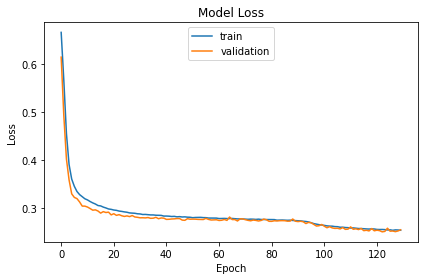

In [18]:
plt.plot(history.history['loss'],"-")
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper center')
plt.tight_layout()
plt.savefig('DNN_Loss_function.pdf')
plt.show()

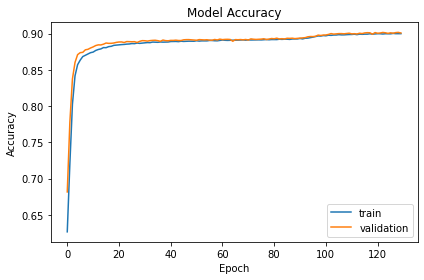

In [19]:
plt.grid(False)
plt.plot(history.history['accuracy'],"-")
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([r'\bf{train}', r'\bf{validation}'],loc='best')
plt.legend(['train', 'validation'], loc='best')
plt.tight_layout()
plt.savefig('DNN_Model_Accuracy.pdf')
plt.show()

In [20]:
pred_train= model.predict(X_train)
pred_train= list(chain.from_iterable(pred_train)) 

scores= model.evaluate(X_train, Y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
pred_test= list(chain.from_iterable(pred_test)) 

scoresS2 = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scoresS2[1], 1 - scoresS2[1]))  

10897/10897 [==============================] - 9s 755us/step
Accuracy on training data: 0.9018499851226807% 
 Error on training data: 0.09815001487731934
4671/4671 [==============================] - 4s 768us/step
Accuracy on test data: 0.9002234935760498% 
 Error on test data: 0.0997765064239502


In [21]:
# Function to retrieve model results
def function1(label, probs):
    sig = []
    backG = []
    for i in range(len(probs)):
        if(label[i] == 1):
            sig.append(probs[i])
            
        elif(label[i] == 0):
            backG.append(probs[i])
            
    return sig,backG

In [22]:
sig_training,back_training = function1(Y_train, pred_train)
sig_testing,back_testing = function1(Y_test, pred_test)

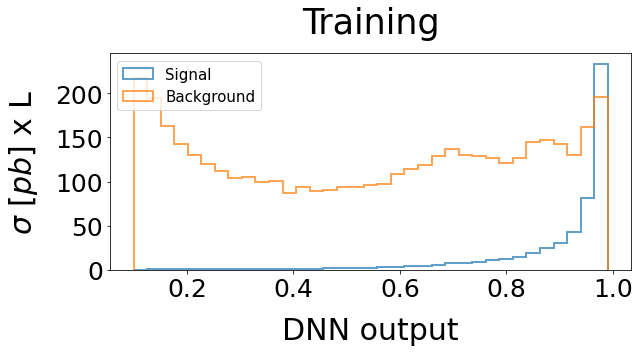

In [50]:
rng = np.random.default_rng(seed=123)

wei20 = 11*500*0.1*(np.ones_like(sig_training) / float(len(sig_training))) #(0.01*0.1) *  #(np.ones_like(sig_training))*0.010*0.1*500000 
wei21 = 21*500*(np.ones_like(back_training) / float(len(back_training))) #(0.016) * # np.ones_like(back_training)*0.016*500000

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(sig_training, weights=wei20, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(back_training, weights=wei21, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Background')


# Add annotations
plt.ylabel('$\sigma$ [$pb$] x L', fontsize=30, labelpad=15)
plt.xlabel('DNN output', fontsize=30, labelpad=15)
plt.title('Training', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
# plt.savefig('train_rmass_cut.pdf')
plt.show()

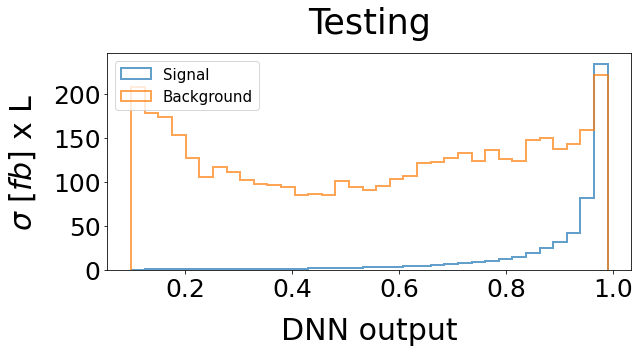

In [51]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

wei20t = 11*500*0.1*(np.ones_like(sig_testing) / float(len(sig_testing)))#0.010*500000*0.1*(np.ones_like(sig_testing) / float(len(sig_testing)))
wei21t = 21*500*(np.ones_like(back_testing) / float(len(back_testing)))#0.016*500000*(np.ones_like(back_testing) / float(len(back_testing)))

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(sig_testing, weights=wei20t, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(back_testing, weights=wei21t, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Background')

# Add annotations
plt.ylabel('$\sigma$ [$fb$] x L', fontsize=30, labelpad=15)
plt.xlabel('DNN output', fontsize=30, labelpad=15)
plt.title('Testing', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
plt.savefig('test_rmass_cut.pdf')
plt.show()

In [52]:
Sigtest_after_DNN = [value for value in sig_testing if 0.8 <= value <= 0.9]

In [53]:
Backtest_after_DNN = [value for value in back_testing if 0.8 <= value <= 0.9]

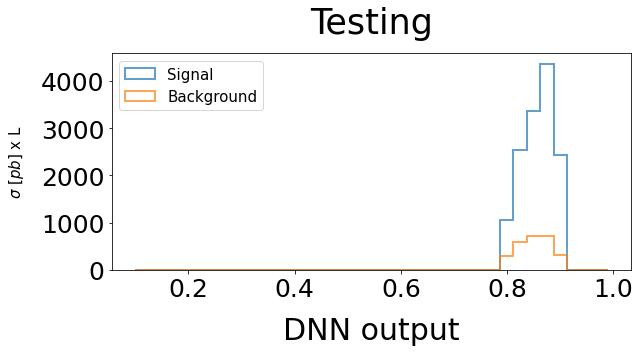

In [54]:
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(Sigtest_after_DNN, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(Backtest_after_DNN, bins=35, range=(0.1,.99), histtype='step', linewidth=2, alpha=0.7, label='Background')

# Add annotations
plt.ylabel('$\sigma$ [$pb$] x L', fontsize=15, labelpad=15)  # Adjust fontsize and padding
plt.xlabel('DNN output', fontsize=30, labelpad=15)
plt.title('Testing', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15, loc='upper left')
plt.tight_layout()
#plt.savefig('test_rmass_cut.pdf')
plt.show()

In [55]:
fpr_Test, tpr_Test, threshold = roc_curve(Y_test, pred_test)
fpr_Train, tpr_Train, threshold = roc_curve(Y_train, pred_train)

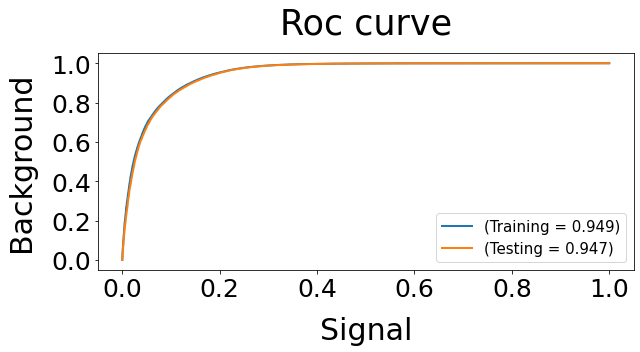

In [56]:
from matplotlib.lines import Line2D

auc_keras_Test = auc(fpr_Test, tpr_Test)
auc_keras_Train = auc(fpr_Train, tpr_Train)

fig, ax = plt.subplots(figsize=(9,5))


ax.plot(fpr_Train, tpr_Train,linewidth=2, label='(Training = {:.3f})'.format(auc(fpr_Train, tpr_Train)))
ax.plot(fpr_Test, tpr_Test,linewidth=2, label='(Testing = {:.3f})'.format(auc(fpr_Test, tpr_Test)))

# Add annotations
plt.ylabel('Background', fontsize=30, labelpad=15)
plt.xlabel('Signal', fontsize=30, labelpad=15)
plt.title('Roc curve', fontsize=35, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('roc_rmass_cut.pdf')
plt.show()

In [57]:
def function(pred_train, feature, start, end):
    final = []
    print(len(pred_train))
    count = 0
    for i in range(len(pred_train)):
        if(pred_train[i]>= start and pred_train[i] <= end ):
            final.append(feature[i])
            count += 1
    print(count/len(pred_train))
    return final

In [58]:
X_train.shape

(348701, 15)

In [59]:
Re_mass1 = function(pred_train, X_train[:,14], 0.8, 0.9)#14

348701
0.11064493649286924


In [60]:
np.shape(Re_mass1)
#Re_mass1

(38582,)

In [61]:
def function3(pred_train, feature, labels, start, end, target_label):
    final = []
    for i in range(len(pred_train)):
        if(start <= pred_train[i] <= end and labels[i] == target_label):
            final.append(feature[i])
    return final

In [62]:
Re_massBack = function3(pred_train, X_train[:,14], Y_train, 0.1, 0.9, 0)#14
Re_massSig = function3(pred_train, X_train[:,14], Y_train, 0.8, 0.9, 1)#14

In [63]:
#np.shape(Re_massSig)
#np.shape(Re_massBack)
Re_massBack

[94.10086597320284,
 94.8379115793999,
 102.87573551771195,
 92.75482062792418,
 89.93986946724065,
 95.84227265133656,
 94.84564279154,
 93.4901094658125,
 93.69850062079854,
 92.5642205375304,
 102.64715169018545,
 90.87903688823397,
 91.16794677369512,
 93.42564506045518,
 94.78199008895805,
 93.36370375143137,
 90.6427633347396,
 101.37333840307826,
 92.10139270072189,
 94.11927342638425,
 94.95214428444122,
 93.42717288633338,
 100.24832380847056,
 105.65868668524699,
 92.19850472154886,
 96.12674422223023,
 93.16467536469057,
 99.02074807959906,
 93.17212904813391,
 92.5325312564718,
 92.65579815214933,
 97.28058411341587,
 98.13348464445465,
 93.14177698479769,
 93.95135894048187,
 98.89078732820172,
 100.02442029953245,
 91.54345805024009,
 92.55244314641209,
 91.37604206972826,
 88.96452271543444,
 94.28625343708136,
 108.5394474291766,
 92.78657559724526,
 92.38063408455282,
 91.02751371857596,
 98.29286469789945,
 97.91009721353619,
 97.79420108431322,
 106.70951512320612,
 

In [64]:
wei221 = 11*500*0.1* np.ones_like(Re_mass1) / float(len(Re_mass1))
wei222 = 21*500* np.ones_like(Re_massBack) / float(len(Re_massBack))

# Check the shapes to ensure they match
print(f"Shape of wei221: {wei221.shape}")  # Should be (25368,)
print(f"Shape of wei222: {wei222.shape}")  # Should be (11753,)


Shape of wei221: (38582,)
Shape of wei222: (42847,)


In [65]:
np.shape(wei222)

(42847,)

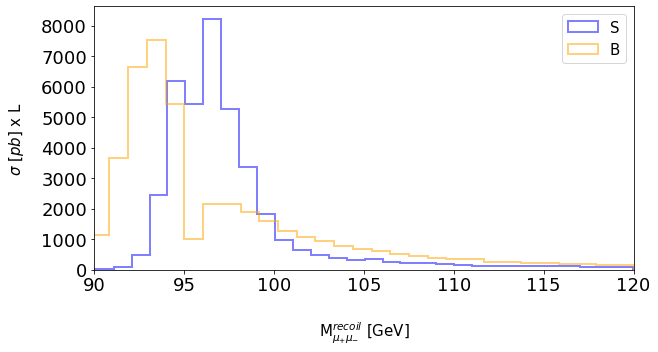

In [81]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

#wei221 = np.ones_like(Re_massSig)*0.01*0.1 #+  np.ones_like(Re_massBack)*0.016 
#wei222 = np.ones_like(Re_massBack)*0.016
wei221 = 11*500*0.1*(np.ones_like(Re_massSig) / float(len(Re_massSig))) #* 0.4
wei222 = 21*500*(np.ones_like(Re_massBack) / float(len(Re_massBack))) #* 0.4


# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
#ax.hist(Re_mass1, weights=wei221, bins=90, histtype='step', linewidth=2, label='S')
#ax.hist(Re_massBack, weights=wei222, bins=90, histtype='step', linewidth=2, label='B')

ax.hist(Re_mass1, bins=100, histtype='step', linewidth=2, label='S',color='blue', alpha=0.5)
ax.hist(Re_massBack, bins=100, histtype='step', linewidth=2, label='B',color='orange', alpha=0.5)

# Remove spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

plt.ylabel('$\sigma$ [$pb$] x L', fontsize=15, labelpad=15)  # Adjust fontsize and padding
plt.xlabel('M$^{recoil}_{\mu_{+} \mu_{-}}$ [GeV]', fontsize=15, labelpad=25)  # Adjust fontsize and padding

# Add title (uncomment if needed)
# plt.title('Class 1', fontsize=30, pad=20)

# Set tick parameters
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=15, loc='upper right')

# Adjust layout and limits
plt.tight_layout()
plt.xlim(90, 120)
plt.savefig('Re mass.pdf')
plt.show()

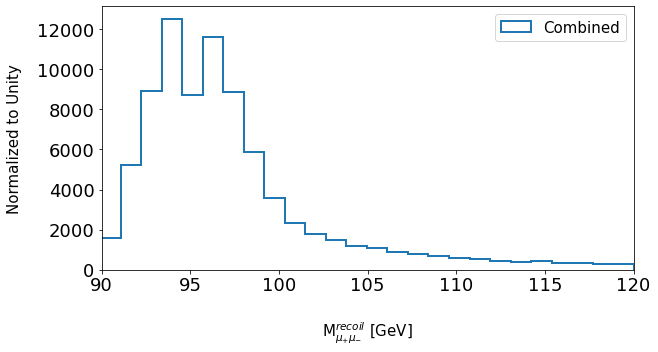

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Re_mass1.shape == (25368,)
# Assuming Re_massBack.shape == (11753,)

# Calculate the weights for the histograms
wei221 = 11*500*0.1*(np.ones_like(Re_mass1) / float(len(Re_mass1))) #500000 * 0.1 * #* 0.4
wei222 = 21*500*(np.ones_like(Re_massBack) / float(len(Re_massBack))) #500000 * #* 0.4

# Combine the data and weights
combined_data = np.concatenate((Re_mass1, Re_massBack))
combined_weights = np.concatenate((wei221, wei222))

# Create a figure with 'step' type of histogram
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the grand histogram
#ax.hist(combined_data, weights=combined_weights, bins=90, histtype='step', linewidth=2, label='Combined')
ax.hist(combined_data, bins=90, histtype='step', linewidth=2, label='Combined')


# Set labels for the x and y axes
plt.ylabel('Normalized to Unity', fontsize=15, labelpad=15)
plt.xlabel('M$^{recoil}_{\mu_{+} \mu_{-}}$ [GeV]', fontsize=15, labelpad=25)

# Set tick parameters for readability
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Add a legend
plt.legend(fontsize=15, loc='upper right')

# Adjust the layout and set the x-axis limits
plt.tight_layout()
plt.xlim(90, 120)

# Save the figure as a PDF
plt.savefig('Re_mass_grand.pdf')

# Display the plot
plt.show()


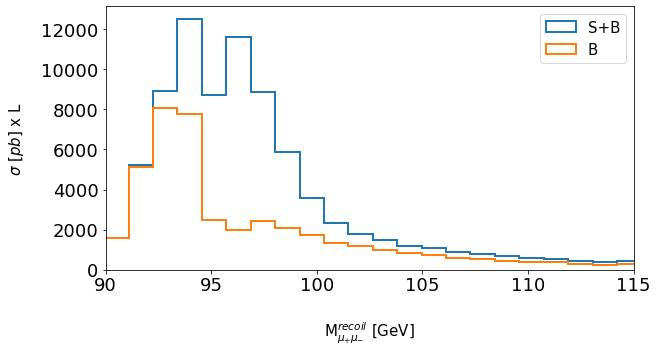

In [68]:
from matplotlib.lines import Line2D

rng = np.random.default_rng(seed=123)

#wei221 = 0.010*500000*0.1*(np.ones_like(Re_mass1) / float(len(Re_mass1)))
#wei222 = 0.016*500000*(np.ones_like(Re_massBack) / float(len(Re_massBack)))


# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(combined_data, bins=90, histtype='step', linewidth=2, label='S+B')
ax.hist(Re_massBack, bins=90, histtype='step', linewidth=2, label='B')

# Remove spines
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

plt.ylabel('$\sigma$ [$pb$] x L', fontsize=15, labelpad=15)  # Adjust fontsize and padding
plt.xlabel('M$^{recoil}_{\mu_{+} \mu_{-}}$ [GeV]', fontsize=15, labelpad=25)  # Adjust fontsize and padding

# Add title (uncomment if needed)
# plt.title('Class 1', fontsize=30, pad=20)

# Set tick parameters
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=15, loc='upper right')

# Adjust layout and limits
plt.tight_layout()
plt.xlim(90, 115)
plt.savefig('Re_mass_FINAL_After_DNN_Cut.pdf')
plt.show()

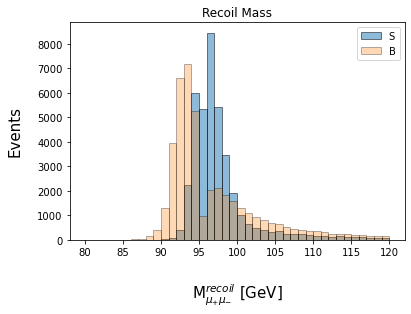

In [78]:
Remass_min = 80
Remass_max = 120
num_bins = 40

#weights
wei221 = 11*500*0.1*(np.ones_like(Re_mass1) / float(len(Re_mass1))) #500000 * 0.1 * #* 0.4
wei222 = 21*500*(np.ones_like(Re_massBack) / float(len(Re_massBack)))

#Create histograms with the specified bin edges
bins = np.linspace(Remass_min, Remass_max, num_bins+1)
n1, _ = np.histogram(Re_mass1, bins=bins)
n2, _ = np.histogram(Re_massBack, bins=bins)

#Prepare the data to save
bin_centres = (bins[:-1] + bins[1:]) / 2
hist_data = np.c_[bin_centres, n1, n2]


#Save the data to a text file
np.savetxt('RecoilMass.txt', hist_data, header='Recoil_mass No_of_Events_S No_of_Events_B', fmt='%f %d %d')

#Optionally you can plot the histograms to visualise them
plt.hist(Re_mass1, bins=bins, edgecolor='black', alpha=0.5, label='S')#,color='blue')
plt.hist(Re_massBack, bins=bins, edgecolor='black', alpha=0.3, label='B')#,color='orange')

plt.ylabel('Events', fontsize=15, labelpad=15)  # Adjust fontsize and padding
plt.xlabel('M$^{recoil}_{\mu_{+} \mu_{-}}$ [GeV]', fontsize=15, labelpad=25)  # Adjust fontsize and padding
plt.title('Recoil Mass')
plt.legend()
plt.savefig('Re_mass_FINAL_After_DNN_Cut.pdf')
plt.show()